In [1]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
import sqlite3
conn = sqlite3.connect("../db.sqlite3")

query_orders = "SELECT * FROM restaurant_order;"
query_order_items = "SELECT * FROM restaurant_orderitem;"
query_products = "SELECT * FROM restaurant_product;"

df_orders = pd.read_sql_query(query_orders, conn)
df_order_items = pd.read_sql_query(query_order_items, conn)
df_products = pd.read_sql_query(query_products, conn)

df_combined = pd.merge(df_order_items, df_orders, on="id", how="outer")
df_combined = pd.merge(df_combined, df_products, on="id", how="outer")

df_combined.to_csv("restaurant.csv", index=False)

df = pd.read_csv("restaurant.csv")

print("Number of rows of this dataframe: ", len(df))


Number of rows of this dataframe:  74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

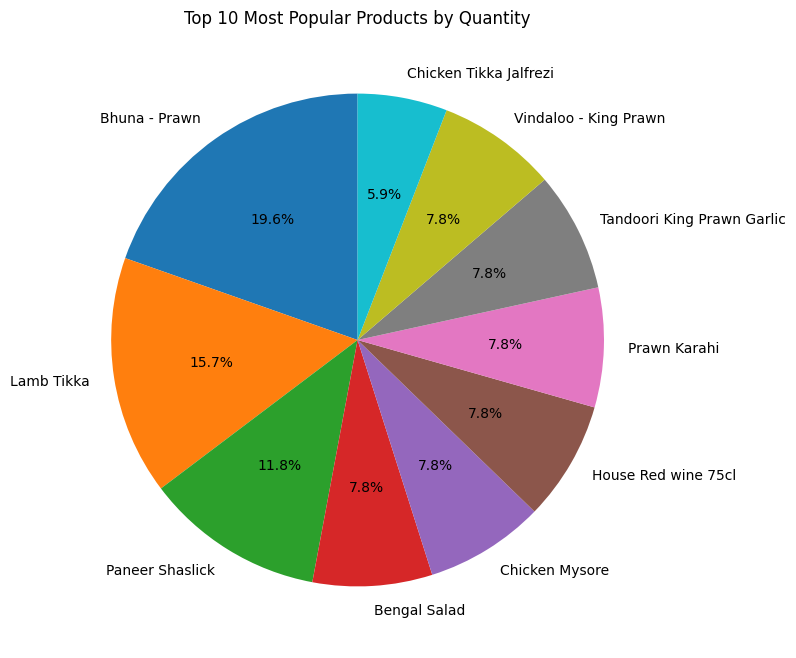

In [7]:
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('../db.sqlite3')

# Step 2: Execute SQL query to get the top 10 most popular products by quantity
query_top_products = """
    SELECT p.name, SUM(oi.quantity) as total_quantity
    FROM main.restaurant_product p
    JOIN main.restaurant_orderitem oi ON p.id = oi.id
    GROUP BY p.name
    ORDER BY total_quantity DESC
    LIMIT 10;
"""

# Step 3: Read the query result into a pandas DataFrame
df_top_products = pd.read_sql_query(query_top_products, conn)

# Step 4: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_top_products["total_quantity"], labels=df_top_products["name"], autopct="%1.1f%%", startangle=90)
plt.title("Top 10 Most Popular Products by Quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

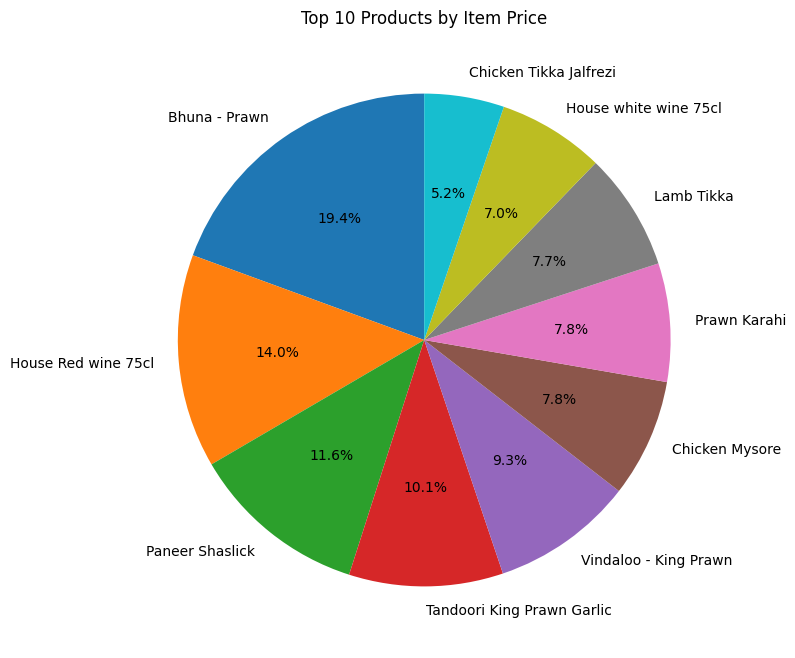

In [9]:
# Step 1: Connect to the SQLite database
conn = sqlite3.connect('../db.sqlite3')

# Step 2: Execute SQL query to get the top 10 products by item price
query_top_products_price = """
    SELECT p.name, SUM(p.price * oi.quantity) as total_price
    FROM main.restaurant_product p
    JOIN main.restaurant_orderitem oi ON p.id = oi.id
    GROUP BY p.name
    ORDER BY total_price DESC
    LIMIT 10;
"""

# Step 3: Read the query result into a pandas DataFrame
df_top_products_price = pd.read_sql_query(query_top_products_price, conn)

# Step 4: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_top_products_price["total_price"], labels=df_top_products_price["name"], autopct=""%1.1f%%"", startangle=90)
plt.title("Top 10 Products by Item Price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

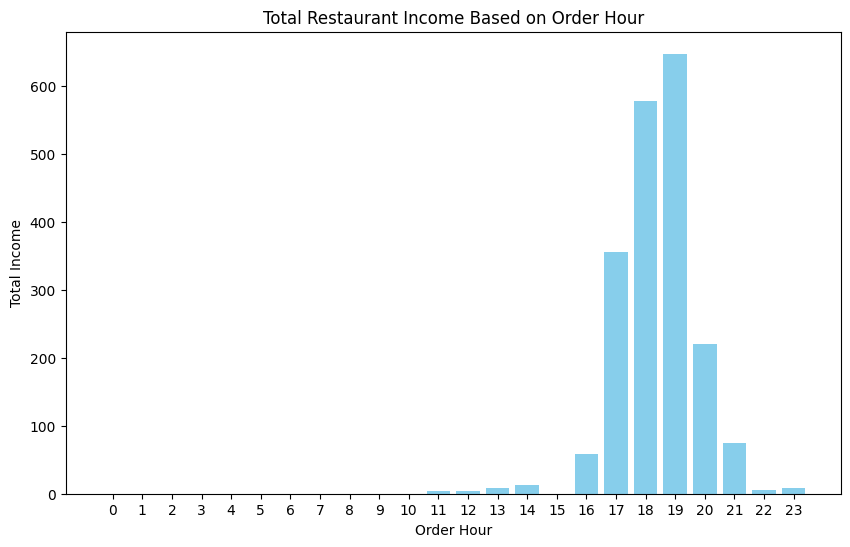

In [13]:
import pandas as pd

# Step 1: Load data from the CSV file
df = pd.read_csv("restaurant.csv")

# Step 2: Convert 'order_datetime' to datetime type
df["datetime"] = pd.to_datetime(df["datetime"])

# Step 3: Extract the hour from 'order_datetime' and create a new column 'order_hour'
df["order_hour"] = df["datetime"].dt.hour

# Step 4: Create a bar chart for total restaurant income based on order hour
df_order_hourly_income = df.groupby("order_hour")["price"].sum().reset_index()

# Step 5: Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_order_hourly_income["order_hour"], df_order_hourly_income["price"], color="skyblue")
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income Based on Order Hour")
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

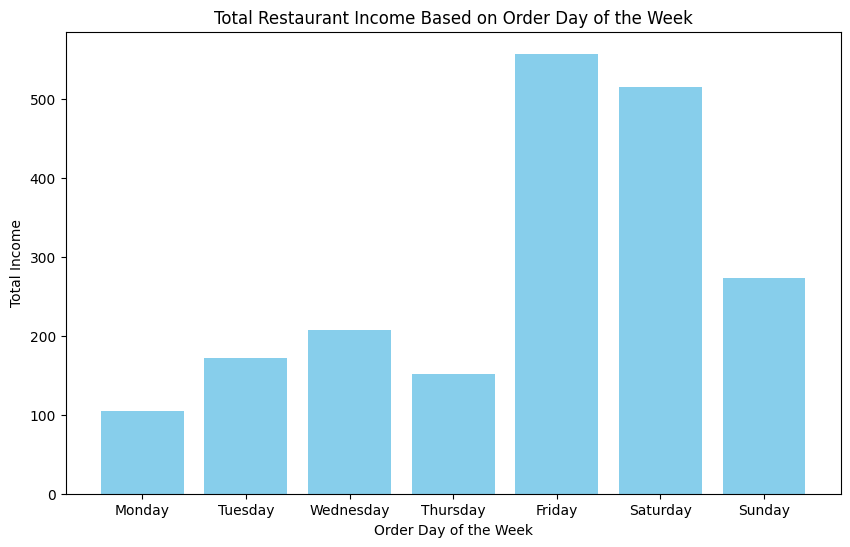

In [15]:
df = pd.read_csv('restaurant.csv')

# Convert 'order_datetime' to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the day of the week from 'order_datetime' and create a new column 'order_day_of_week'
df['order_day_of_week'] = df['datetime'].dt.dayofweek  # Monday is 0, Sunday is 6

# Create a bar chart for total restaurant income based on order day of the week
df_order_daily_income = df.groupby('order_day_of_week')['price'].sum().reset_index()

# Map the day of the week numbers to actual day names
day_of_week_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_order_daily_income['order_day_of_week'] = df_order_daily_income['order_day_of_week'].map(dict(enumerate(day_of_week_names)))

#  Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_order_daily_income['order_day_of_week'], df_order_daily_income['price'], color='skyblue')
plt.xlabel('Order Day of the Week')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income Based on Order Day of the Week')
plt.show()